# Genesis 5

- From Adam to Noah (1-32)
- Adam fathered sons and daughters (4)
- Enoch walked with God (21-24)

Creating a timeline is not that easy. The datetime from pandas is limited:

In [1]:
import pandas as pd

print("Minimum time is:", pd.Timestamp.min)
print("Maximum time is:", pd.Timestamp.max)
y = 2262-1677
d = y * 365.25
s = d *24 * 60 * 60
print(y, d, s)
print(2**64)

Minimum time is: 1677-09-21 00:12:43.145224193
Maximum time is: 2262-04-11 23:47:16.854775807
585 213671.25 18461196000.0
18446744073709551616


Obviously Timestamp only supports dates from 1677 to 2262. The reason is to use a 64bit representation of time and be able to have nanosecond precision. 

A build in time format in python is datetime. It has a much larger range than 585 years, but is not much better, since it does not support BCE dates. Guido van Rossum commented on this in 2018 with reference to the nonexsisting year zero and other problems.

In [2]:
import datetime
print(datetime.datetime.min)
print(datetime.datetime.max)

0001-01-01 00:00:00
9999-12-31 23:59:59.999999


A solution is [astropy.time](https://docs.astropy.org/en/stable/time/index.html) For a start we just use integers for the years.

In [28]:
import pandas as pd

generation = pd.read_csv("https://raw.githubusercontent.com/kreier/study/main/markdown/01_Ge/05.csv")
print(generation)

generation['start'] = -generation['born']

for index, row in generation.iterrows():
    print(row)
#     print(f"was born in {row.born} BCE and died {row.died} BCE and he lived {row.born - row.died} years.")

             name  born  died           notes
0            Adam  4026  3096             NaN
1            Seth  3896  2984             NaN
2          Eʹnosh  3791  2886             NaN
3          Keʹnan  3701  2791             NaN
4    Ma·halʹa·lel  3631  2736             NaN
5          Jaʹred  3566  2604             NaN
6          Eʹnoch  3404  3039             NaN
7   Me·thuʹse·lah  3339  2370             NaN
8         Laʹmech  3152  2377             NaN
9            Noah  2970  2020  flood 2370 BCE
10           Shem  2468  1868             NaN
name      Adam
born      4026
died      3096
notes      NaN
start    -4026
Name: 0, dtype: object
name      Seth
born      3896
died      2984
notes      NaN
start    -3896
Name: 1, dtype: object
name     Eʹnosh
born       3791
died       2886
notes       NaN
start     -3791
Name: 2, dtype: object
name     Keʹnan
born       3701
died       2791
notes       NaN
start     -3701
Name: 3, dtype: object
name     Ma·halʹa·lel
born             3631
di

ValueError: too many values to unpack (expected 2)

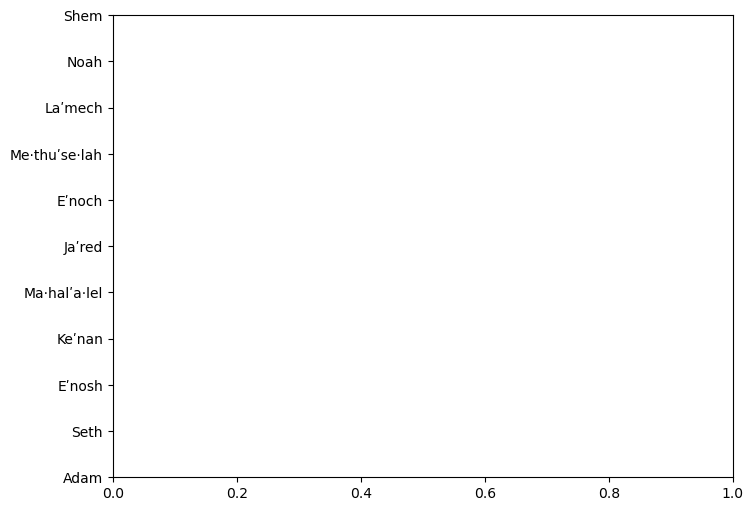

In [11]:
import matplotlib.pyplot as plt

fig, gnt = plt.subplots(figsize=(8,6))

y_tick_labels = generation['name']
y_pos = np.arange(len(y_tick_labels))

gnt.set_yticks(y_pos)
gnt.set_yticklabels(y_tick_labels)

for index, row in generation.sort_values(by='start').reset_index().iterrows():
    start_year = int(row.born)
    duration = start_year - generation.died
    gnt.broken_barh([(start_year, duration)], 
                    (index-0.5,0.8), 
                    facecolors =('tan'),
                   label=row.name)
    gnt.text(start_year+0.5, index-0.2, row.name)

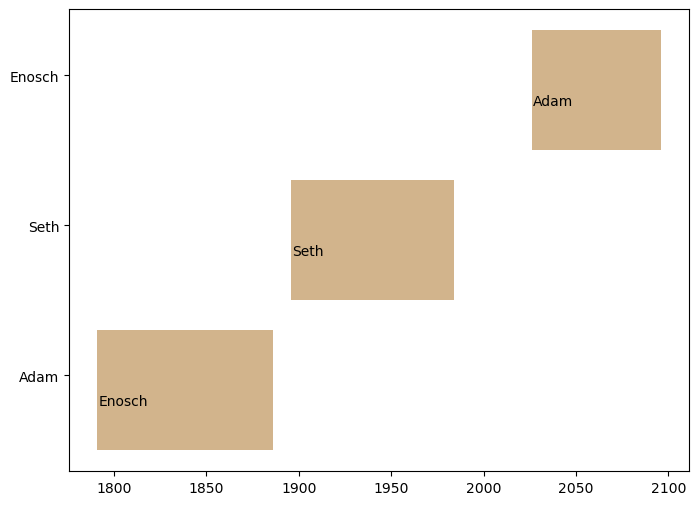

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# source = pd.DataFrame([
#     {"person": "Adam",   "start": '-4026-01-01', "end": '-3096-01-01'},
#     {"person": "Seth",   "start": '-3896-01-01', "end": '-2984-01-01'},
#     {"person": "Enosch", "start": '-3791-01-01', "end": '-2886-01-01'}
# ])

source = pd.DataFrame([
    {"person": "Adam",   "start": '2026-01-01', "end": '2096-01-01'},
    {"person": "Seth",   "start": '1896-01-01', "end": '1984-01-01'},
    {"person": "Enosch", "start": '1791-01-01', "end": '1886-01-01'}
])

source['start'] = pd.to_datetime(source['start'])
source['end'] = pd.to_datetime(source['end'])
source['diff'] = source['end'] - source['start']
 
# Declaring a figure "gnt"
fig, gnt = plt.subplots(figsize=(8,6))
 
# Need to fix hidden tick labels
# https://stackoverflow.com/questions/43673659/matplotlib-not-showing-first-label-on-x-axis-for-the-bar-plot
 
y_tick_labels = source.person.values
y_pos = np.arange(len(y_tick_labels))
 
gnt.set_yticks(y_pos)
gnt.set_yticklabels(y_tick_labels)

# https://sparkbyexamples.com/python/iterate-over-rows-in-pandas-dataframe/
# https://www.tutorialspoint.com/plotting-dates-on-the-x-axis-with-python-s-matplotlib
# https://matplotlib.org/stable/gallery/color/named_colors.html
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
# https://www.geeksforgeeks.org/how-to-annotate-matplotlib-scatter-plots
for index, row in source.sort_values(by='start').reset_index().iterrows():
    start_year = int(row.start.strftime("%Y"))
    duration = row['diff'].days/365
    gnt.broken_barh([(start_year, duration)], 
                    (index-0.5,0.8), 
                    facecolors =('tan'),
                   label=row.person)
    gnt.text(start_year+0.5, index-0.2, row.person)

## Hint for VS Code and Jupyter

The source for the kernel is C:\Users\matth\anaconda3\python.exe